## Creating a model from your own data (remix)

In [1]:
from duckduckgo_search import DDGS 
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [2]:
urls = search_images('pico bolivar mountain photo', max_images=1)
urls[0]

'http://fc05.deviantart.net/fs33/i/2008/289/7/1/Pico_Bolivar_by_gruyita.jpg'

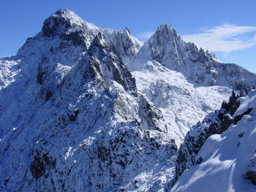

In [3]:
dest = 'pico_bolivar.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

In [15]:
urls = search_images('el avila mountain photo', max_images=1)
urls[0]

'https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/national-park-of-el-avila-caracas-venezuela-alejandro-ascanio.jpg'

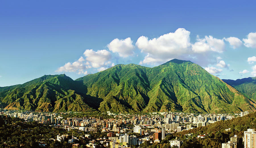

In [16]:
dest = 'el_avila.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

In [2]:
searches = 'el avila mountain','pico bolivar mountain'
path = Path('el_avila_or_not')

In [8]:
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

In [3]:
# data cleanup
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

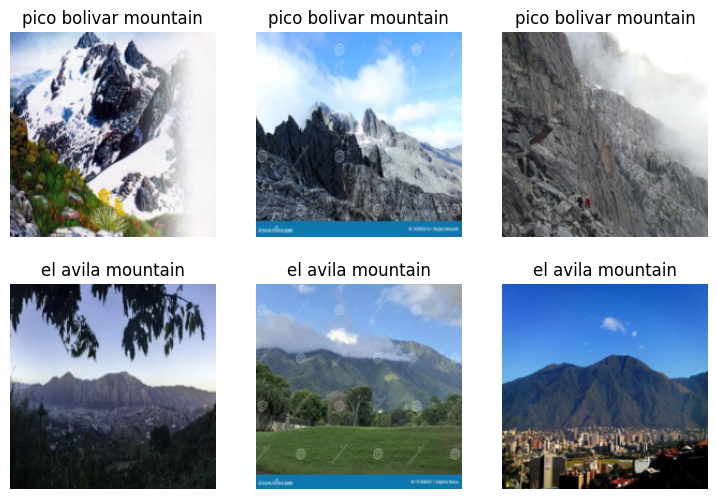

In [4]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=777),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.317518,0.653510,0.269841,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.558013,0.366951,0.126984,00:00
1,0.464831,0.297699,0.095238,00:01
2,0.371081,0.299549,0.079365,00:01
3,0.296349,0.310656,0.063492,00:00
4,0.248788,0.311183,0.079365,00:00
5,0.207226,0.317681,0.079365,00:00
6,0.174133,0.320618,0.079365,00:01
7,0.148392,0.318041,0.063492,00:00
8,0.129535,0.320276,0.063492,00:01
9,0.113219,0.319115,0.063492,00:01


In [6]:
is_avila,_,probs = learn.predict(PILImage.create('el_avila.jpg'))
print(f"This is: {is_avila}.")
print(f"Probability it's El Avila mountain: {probs[0]:.4f}")

This is: el avila mountain.
Probability it's El Avila mountain: 1.0000


In [7]:
is_pico_bolivar,_,probs = learn.predict(PILImage.create('pico_bolivar.jpg'))
print(f"This is: {is_pico_bolivar}.")
print(f"Probability it's Pico Bolivar mountain: {probs[1]:.4f}")

This is: pico bolivar mountain.
Probability it's Pico Bolivar mountain: 1.0000


In [8]:
# learn.export('model/model.pkl')